## CRISP-DM Phase 2. Data Understanding

In [31]:
# Importing libraries
import sys
sys.path.append('../src')
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Data Collection / Loading

In [32]:
df_energy: pd.DataFrame = utils.load_energy_data()
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [33]:
df_weather: pd.DataFrame = utils.load_weather_data()
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### Describe Data

#### Energy data

In [21]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [30]:
if len(df_energy.select_dtypes(include=["object"]).columns) == 0:
    print("There isn't object type data")
else:
    print("Object type data:")
    print(df_energy.select_dtypes(include=["object"]).columns.tolist())

Object type data:
['time']


In [13]:
df_energy.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Weather Data

In [22]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [45]:
if len(df_weather.select_dtypes(include=["object"]).columns) == 0:
    print("There isn't object type data")
else:
    print("Object type data:")
    print(df_weather.select_dtypes(include=["object"]).columns.tolist(), "\n")
    print(df_weather[df_weather.select_dtypes(include=["object"]).columns.tolist()], "\n")
    for col in df_weather[df_weather.select_dtypes(include=["object"]).columns.tolist()]:
        print(col, ":", len(df_weather[col].unique()), " unique values")

Object type data:
['dt_iso', 'city_name', 'weather_main', 'weather_description', 'weather_icon'] 

                           dt_iso city_name weather_main weather_description  \
0       2015-01-01 00:00:00+01:00  Valencia        clear        sky is clear   
1       2015-01-01 01:00:00+01:00  Valencia        clear        sky is clear   
2       2015-01-01 02:00:00+01:00  Valencia        clear        sky is clear   
3       2015-01-01 03:00:00+01:00  Valencia        clear        sky is clear   
4       2015-01-01 04:00:00+01:00  Valencia        clear        sky is clear   
...                           ...       ...          ...                 ...   
178391  2018-12-31 19:00:00+01:00   Seville        clear        sky is clear   
178392  2018-12-31 20:00:00+01:00   Seville        clear        sky is clear   
178393  2018-12-31 21:00:00+01:00   Seville        clear        sky is clear   
178394  2018-12-31 22:00:00+01:00   Seville        clear        sky is clear   
178395  2018-12-31 23

In [33]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500


### Explore Data

#### Energy data

In [4]:
numerical_features = [col for col in df_energy.columns if df_energy[col].dtype != "O"]
df_energy = df_energy[numerical_features]

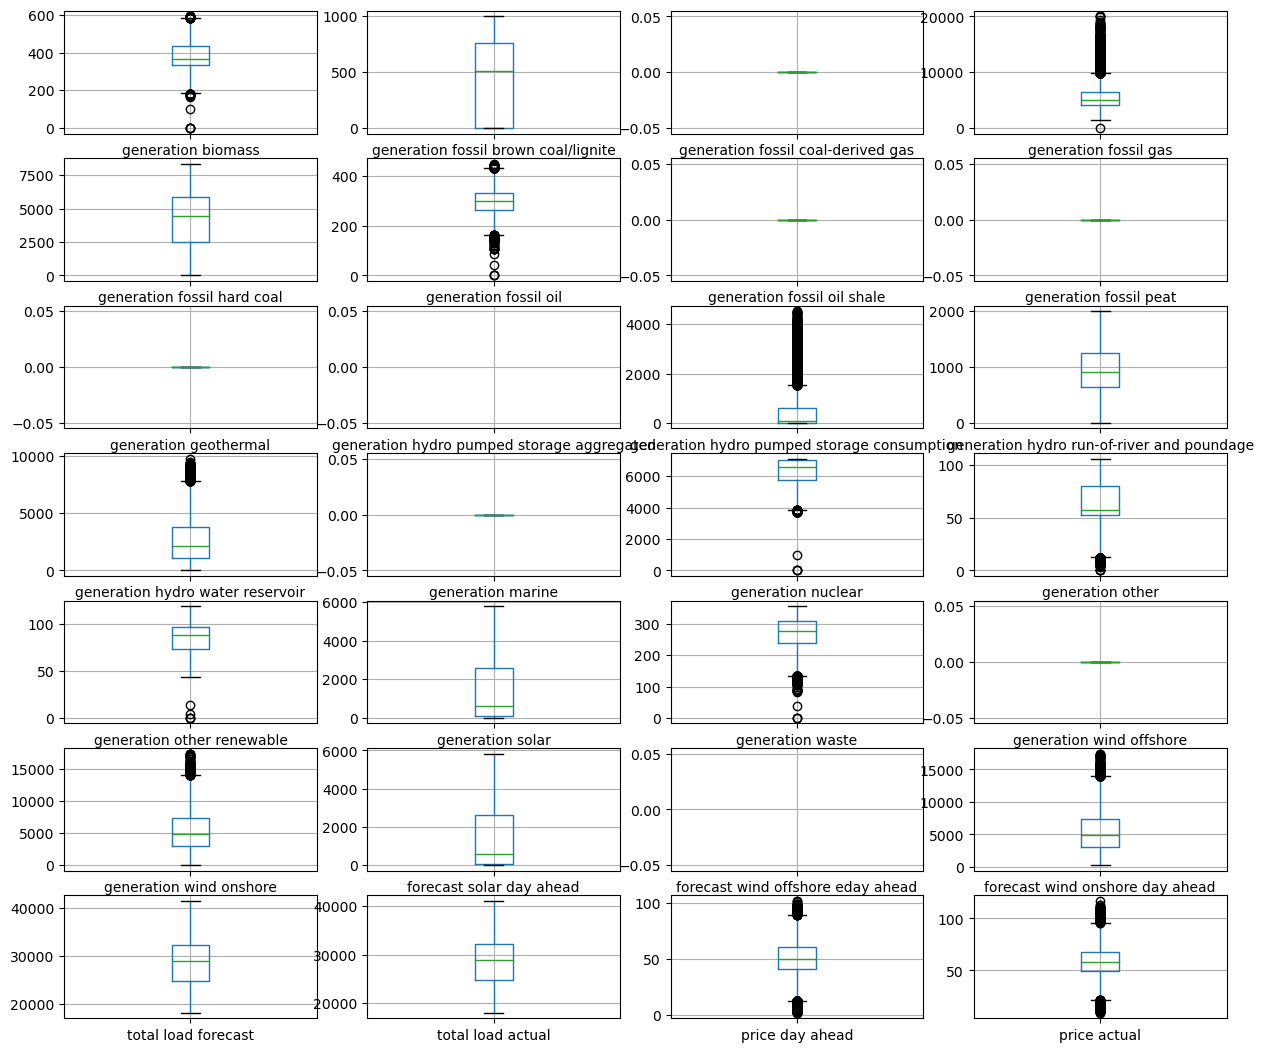

In [89]:
# boxplot of numerical features
fig = plt.figure(figsize=(15, 15))
n_rows = round(len(numerical_features)/4)
for i, col in enumerate(numerical_features):
    fig.add_subplot(8, 4, i+1)
    df_energy.boxplot(column=col)
plt.show()

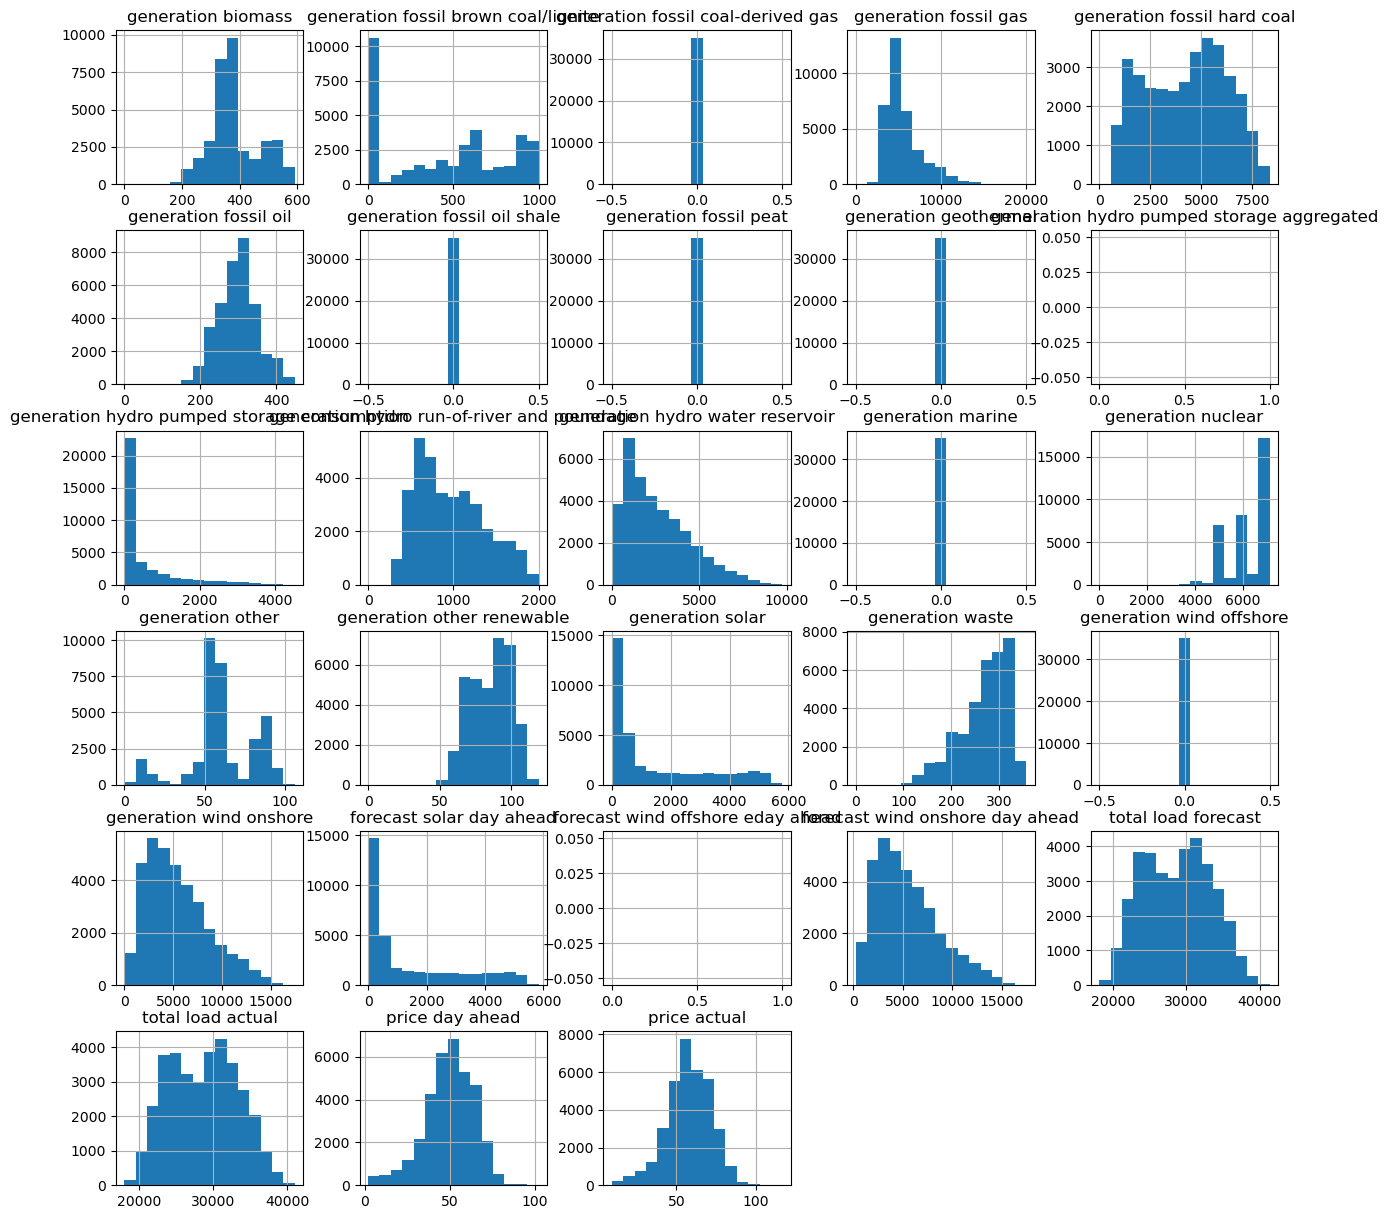

In [90]:
df_energy.hist(bins=15, figsize=(15, 15))
plt.show()

#### Price data: target variable

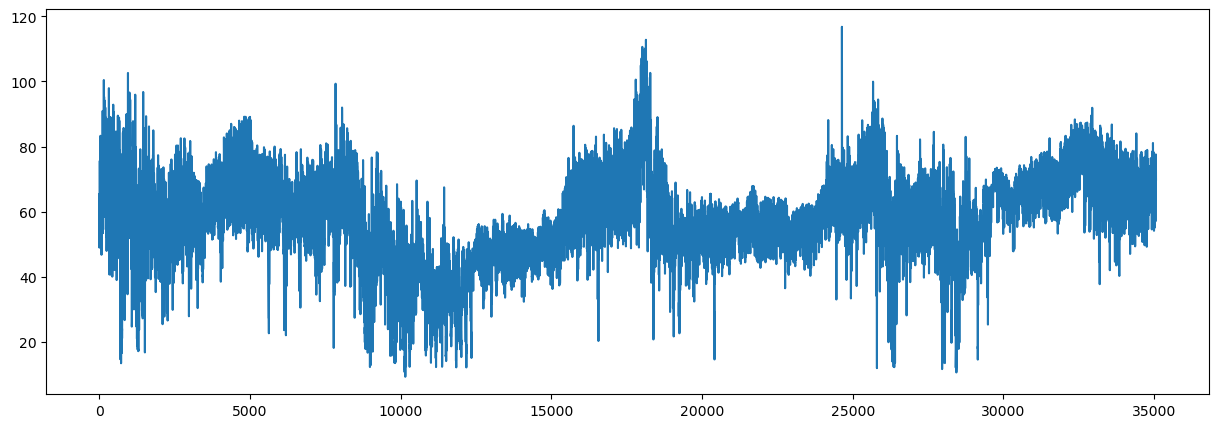

In [5]:
# Price data: target variable
fig = plt.figure(figsize=(15, 5))
df_energy["price actual"].plot()
plt.title("Price actual")
plt.show()

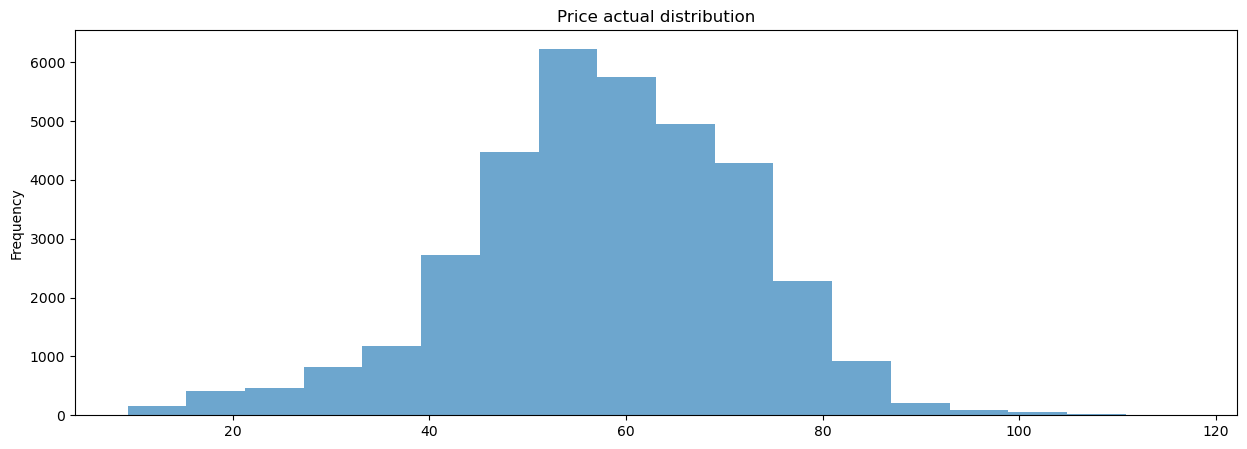

In [49]:
fig = plt.figure(figsize=(15, 5))
df_energy['price actual'].plot.hist(bins=18, alpha=0.65)
plt.title('Price actual distribution')
plt.show()

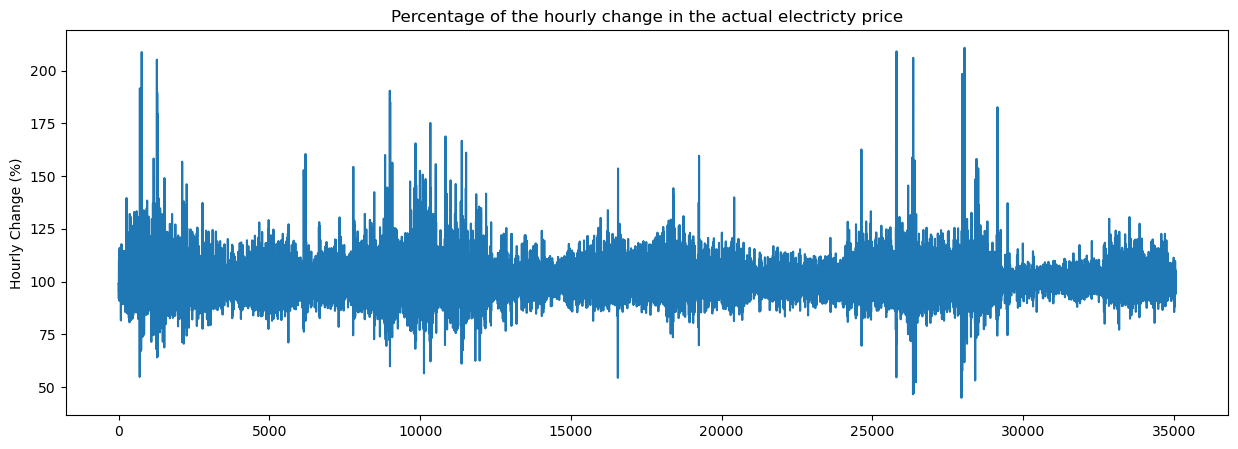

In [50]:
def plot_series(series: pd.Series, ylabel: str, title: str):
    fig = plt.figure(figsize=(15, 5))
    ax = series.plot()
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

change = df_energy['price actual'].div(df_energy['price actual'].shift(1)).mul(100)
ax = plot_series(series=change, ylabel='Hourly Change (%)', 
                 title='Percentage of the hourly change in the actual electricty price')
plt.show()

Pearson correlation is commonly used to determine the association between two continuous variables.
Many frameworks, like pandas, have it as their default correlation metric.

Beacause Pearson correlation only measures the linear relationship, Spearman correlation is a better alternative.
It assesses monotonicity, which can be linear as well as nonlinear.

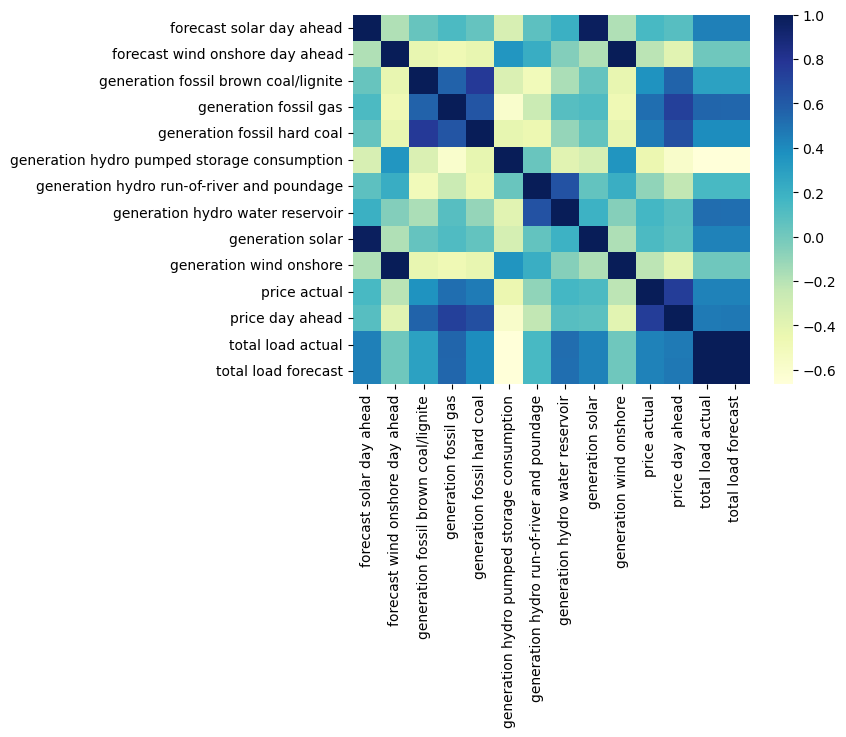

In [6]:
# Because of the high number of features, we will use a filtered heatmap to observe the correlation
# between features with a correlation higher than 0.6

corrDf = df_energy.corr(method='spearman')
sns.heatmap(utils.filtered_heatmap(corrDf,0.6),cmap="YlGnBu")
plt.show()

#### Weather data

In [7]:
numerical_features = [col for col in df_weather.columns if df_weather[col].dtype != "O"]
df_weather = df_weather[numerical_features]

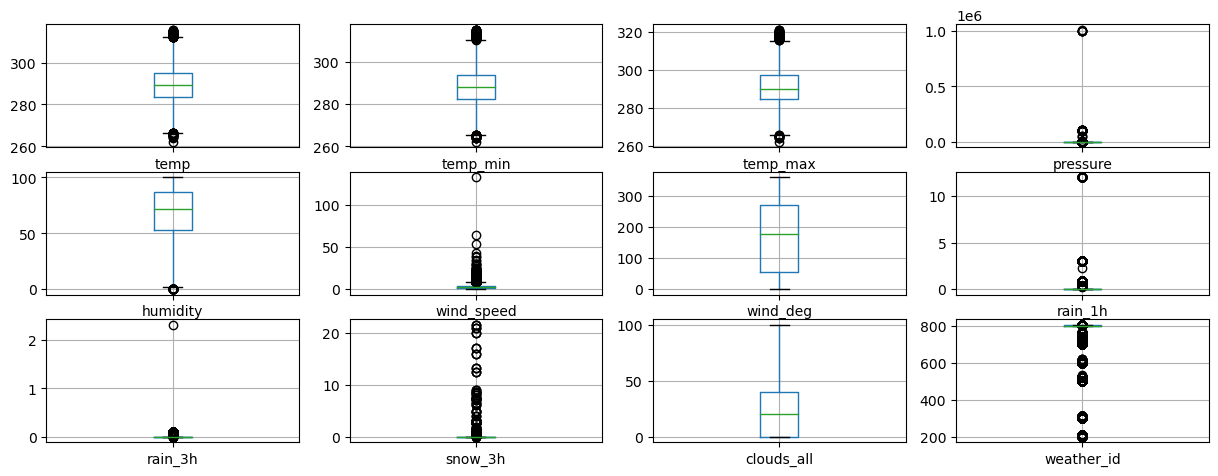

In [8]:
# boxplot of numerical features
numerical_features = [col for col in df_weather.columns if df_weather[col].dtype != "O"]
fig = plt.figure(figsize=(15, 15))
n_rows = round(len(numerical_features)/4)
for i, col in enumerate(numerical_features):
    fig.add_subplot(8, 4, i+1)
    df_weather.boxplot(column=col)
plt.show()

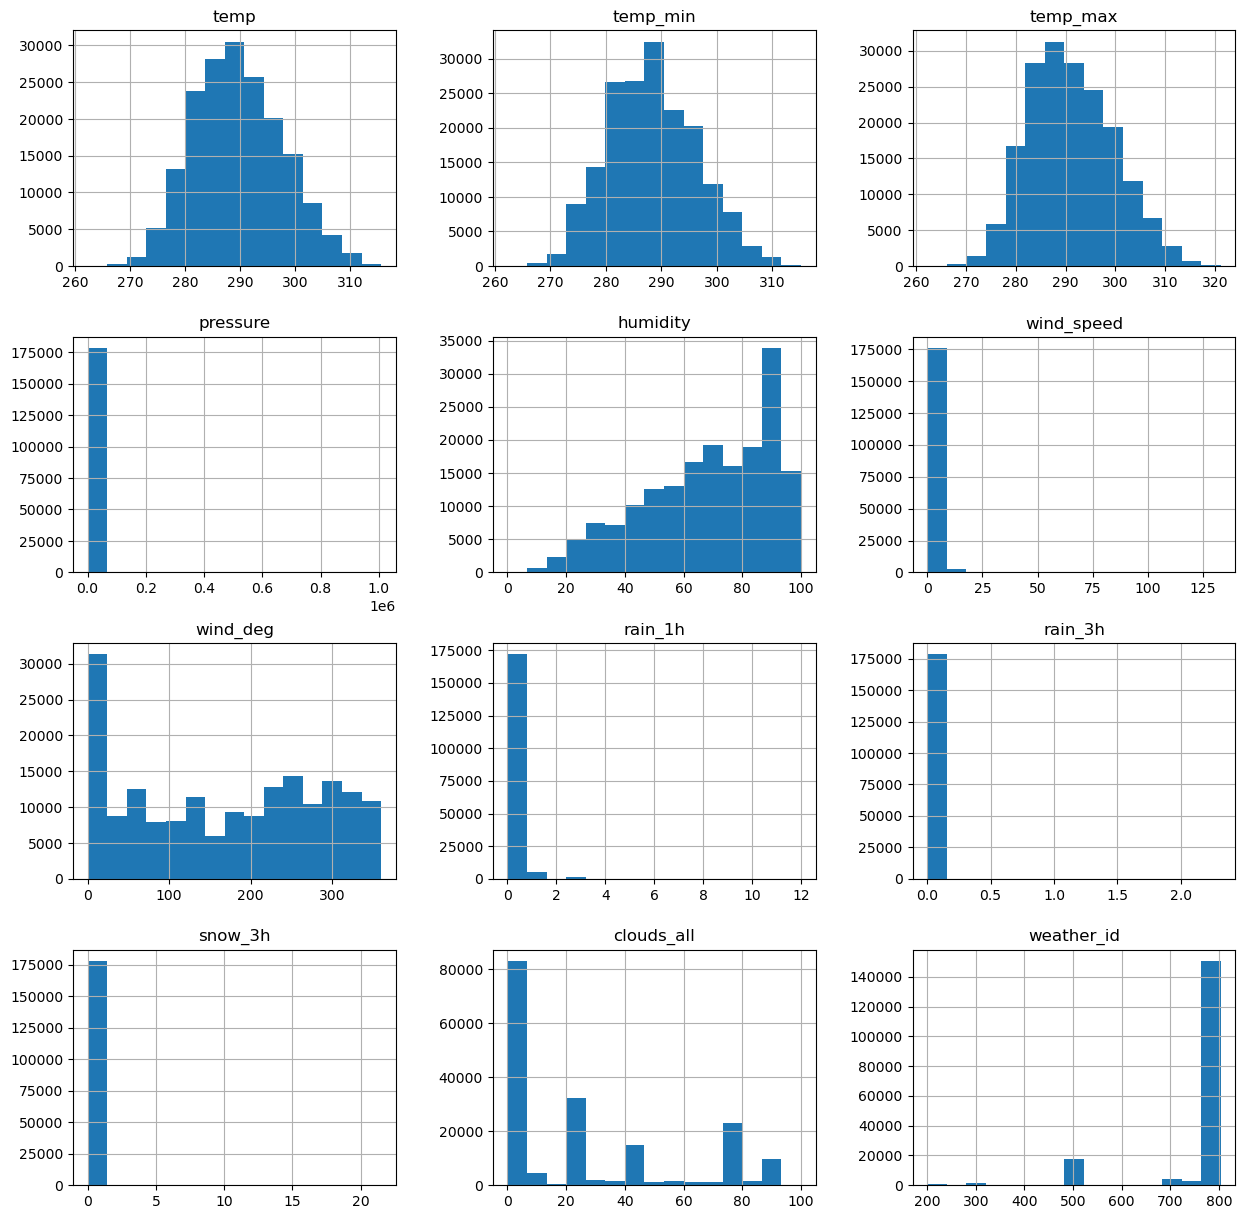

In [9]:
df_weather.hist(bins=15, figsize=(15, 15))
plt.show()

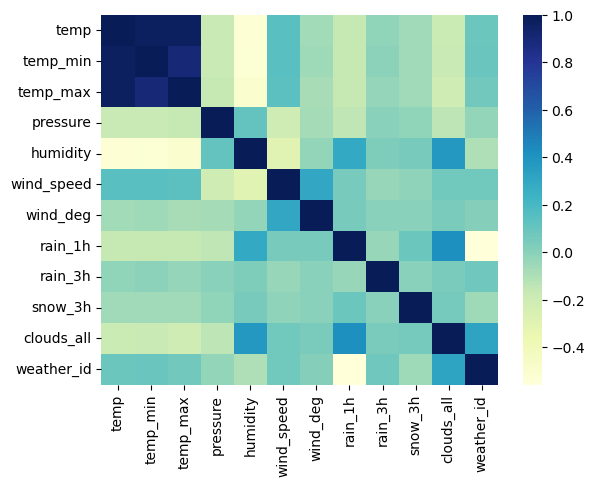

In [11]:
# Beacause of the lower number of features compared to the energy data, I will use the full correlation matrix
corrDf = df_weather.corr(method='spearman')
sns.heatmap(corrDf,cmap="YlGnBu")
plt.show()

In [45]:
weather_by_city = df_weather.groupby('city_name')

for city_name, weather_city in weather_by_city:
    print(city_name, ":", len(weather_city), "observations")

 Barcelona : 35476 observations
Bilbao : 35951 observations
Madrid : 36267 observations
Seville : 35557 observations
Valencia : 35145 observations


### Verify Data Quality

#### Duplicated Values

##### Energy data

In [47]:
print("Number of duplicated rows on energy data: ", df_energy.duplicated().sum())

Number of duplicated rows on energy data:  0


##### Weather Data

In [48]:
print("Number of duplicated rows on weather data: ", df_energy.duplicated().sum())

Number of duplicated rows on weather data:  0


In [43]:
for city_name, weather_city in weather_by_city:
    print("{} duplicated rows:".format(city_name), weather_city.duplicated().sum(), "\n")

 Barcelona duplicated rows: 4 

Bilbao duplicated rows: 4 

Madrid duplicated rows: 4 

Seville duplicated rows: 4 

Valencia duplicated rows: 5 



#### Missing values

##### Energy data

Missing values per feature:
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste  

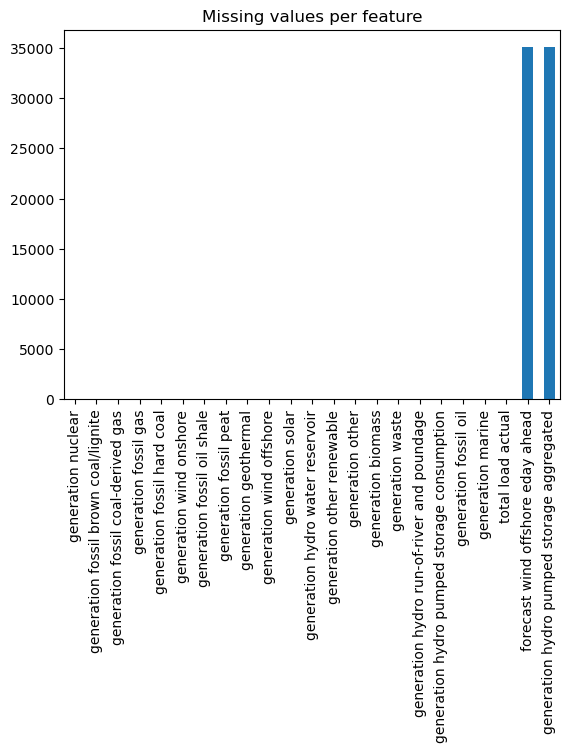

In [42]:
missing_values = df_energy.isnull().sum()
print("Missing values per feature:")
print(missing_values)
print("Total number of missing values (total of {} data points):{}".format(df_energy.shape[0]*df_energy.shape[1], missing_values.sum()))

missing_values = missing_values[missing_values > 0]
if missing_values.shape[0]:
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.title("Missing values per feature")
    plt.show()

##### Weather Data

In [43]:
missing_values = df_weather.isnull().sum()
print(missing_values)
print("Total number of missing values (total of {} data points): {}".format(df_weather.shape[0]*df_weather.shape[1], missing_values.sum()))

missing_values = missing_values[missing_values > 0]
if missing_values.shape[0]:
    print("asd")
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.show()

temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
weather_id    0
dtype: int64
Total number of missing values (total of 2140752 data points):0


In [39]:
for city_name, weather_city in weather_by_city:
    print(city_name, ":", weather_city.isnull().sum().sum(), "null values \n")

 Barcelona : 0 

Bilbao : 0 

Madrid : 0 

Seville : 0 

Valencia : 0 



#### Outlier Analysis

##### Energy data

In [45]:
outliers = utils.id_outliers(df_energy)
print("Total number of outliers: {} in {} data points".format(outliers["n_outliers"].sum(), sum(df_energy.count())))
outliers

Total number of outliers: 10652 in 911263 data points


,lower_bound,upper_bound,n_outliers
generation biomass,183.00000,583.00000,87
generation fossil brown coal/lignite,-1135.50000,1892.50000,0
generation fossil coal-derived gas,0.00000,0.00000,0
generation fossil gas,671.50000,9883.50000,2185
generation fossil hard coal,-2440.62500,10806.37500,0
generation fossil oil,162.50000,430.50000,246
generation fossil oil shale,0.00000,0.00000,0
generation fossil peat,0.00000,0.00000,0
generation geothermal,0.00000,0.00000,0
generation hydro pumped storage aggregated,NaN,NaN,0


##### Weather Data

In [46]:
outliers = utils.id_outliers(df_weather)
print("Total number of outliers: {} in {} data points".format(outliers["n_outliers"].sum(), sum(df_weather.count())))
outliers

Total number of outliers: 84370 in 2140752 data points


,lower_bound,upper_bound,n_outliers
temp,266.450000,312.37000,196
temp_min,265.613816,310.59991,290
temp_max,265.900000,315.90000,391
pressure,999.500000,1035.50000,11830
humidity,2.000000,138.00000,63
wind_speed,-3.500000,8.50000,2425
wind_deg,-267.500000,592.50000,0
rain_1h,0.000000,0.00000,19388
rain_3h,0.000000,0.00000,1855
snow_3h,0.000000,0.00000,267
